# Complex-Valued Activation Functions

In this notebook we are going to plot and analyze briefly the main activation functions designed durign the years to work with complex-valued models.

In [1]:
# Dependencies
import numpy as np
import matplotlib.pyplot as plt
import cplot
import pickle
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import seaborn as sns

%matplotlib inline

In [2]:
import haiku as hk
from complex_nn.activations import *
from complex_nn.layers import Cmplx_Linear, CmplxBatchNorm, Dropout
from complex_nn.optimizers import cmplx_adam
from complex_nn.Classifier_wrapper import Haiku_Classifier

### Complex Sigmoid

$$
f(z) = \frac{1}{1+e^{-z}}
$$

In [3]:
def complex_sigmoid(z):
    return 1. / (1. + np.exp(-z))

3D and contour plot:

(0.0, 4.0)

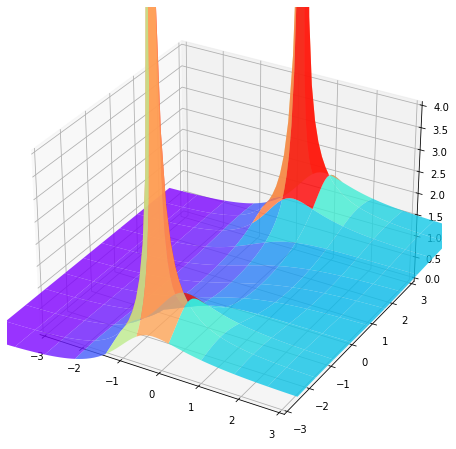

In [4]:
re = np.arange(-4,4,0.1)
im = np.arange(-4,4,0.1)
RE, IM = np.meshgrid(re, im)
abs_f = np.abs(complex_sigmoid(RE+1.j*IM))
phase_f = np.angle(complex_sigmoid(RE+1.j*IM))

fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111, projection='3d')

abs_plot = ax1.plot_surface(RE, IM, abs_f, rstride=8, cstride=8, alpha=0.8, cmap=cm.rainbow)
#cset = ax1.contourf(RE, IM, abs_f, zdir='z', offset=-5, cmap=cm.rainbow)
#cset = ax1.contourf(RE, IM, abs_f, zdir='x', offset=-5, cmap=cm.rainbow)
#cset = ax1.contourf(RE, IM, abs_f, zdir='y', offset=5, cmap=cm.rainbow)

ax1.set_xlim(-3,3)
ax1.set_ylim(-3,3)
ax1.set_zlim(0,4)

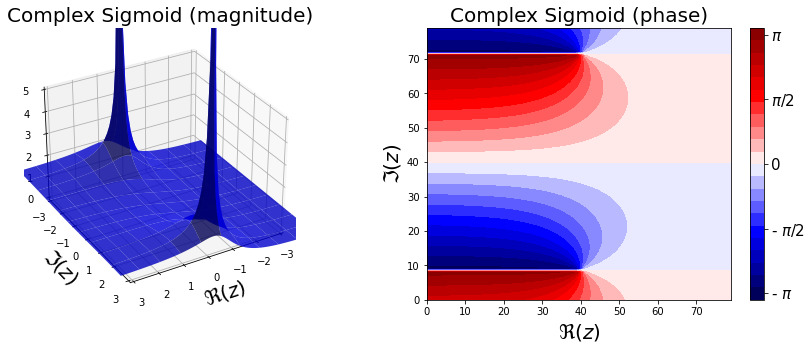

In [5]:
re = np.arange(-4,4,0.1)
im = np.arange(-4,4,0.1)
RE, IM = np.meshgrid(re, im)
abs_f = np.abs(complex_sigmoid(RE+1.j*IM))
phase_f = np.angle(complex_sigmoid(RE+1.j*IM))

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)

abs_plot = ax1.plot_surface(RE, IM, abs_f, rstride=8, cstride=8, alpha=0.8, color='blue')
phase_plot = ax2.contourf(phase_f, levels=20, cmap='seismic')
cbar = fig.colorbar(phase_plot)

cbar.set_ticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
cbar.set_ticklabels(['- $\pi$', '- $\pi$/2', '0', '$\pi$/2', '$\pi$'])
cbar.ax.tick_params(labelsize=15) 

ax1.set_xlabel(r'$\Re(z)$', fontsize=20)
ax1.set_xlim(-3, 3)
ax1.set_ylabel(r'$\Im(z)$', fontsize=20)
ax1.set_ylim(-3, 3)
ax1.set_zlim(0, 5)
ax1.set_title('Complex Sigmoid (magnitude)', fontsize=20)
ax1.view_init(elev=30, azim=60)


ax2.set_xlabel(r'$\Re(z)$', fontsize=20)
ax2.set_ylabel(r'$\Im(z)$', fontsize=20)
ax2.set_title('Complex Sigmoid (phase)', fontsize=20);

In [6]:
#fig.savefig('cmplx_sigmoid.pdf')

### Activations inherited from real-valued case

Text(0.5, 1.0, 'Complex Tanh')

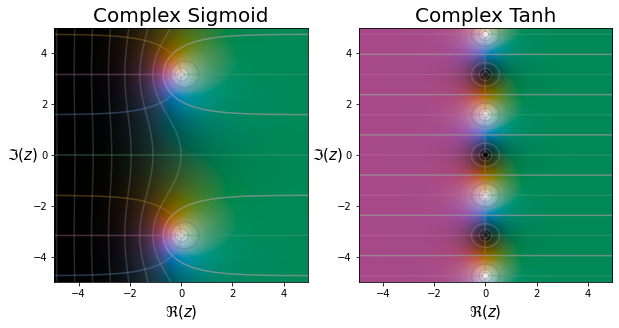

In [7]:
fig = plt.figure(figsize=(10, 7))

ax = fig.add_subplot(1, 2, 1)
cplot.plot(f=cmplx_sigmoid, x_range=(-5,5,100), y_range=(-5,5,100), add_colorbars=False)
ax.set_xlabel(r'$\Re(z)$', fontsize=15)
ax.set_ylabel(r'$\Im(z)$', fontsize=15)
ax.set_title('Complex Sigmoid', fontsize=20)

ax = fig.add_subplot(1, 2, 2)
cplot.plot(f=cmplx_tanh, x_range=(-5,5,100), y_range=(-5,5,100), add_colorbars=False)
ax.set_xlabel(r'$\Re(z)$', fontsize=15)
ax.set_ylabel(r'$\Im(z)$', fontsize=15)
ax.set_title('Complex Tanh', fontsize=20)

### Separable Activations

/home/mattia/anaconda3/envs/jax_env/lib/python3.9/site-packages/cplot/_main.py:140: UserWarning: No contour levels were found within the data range.
  plt.contour(
/home/mattia/anaconda3/envs/jax_env/lib/python3.9/site-packages/cplot/_main.py:153: RuntimeWarning: divide by zero encountered in log
  min_exp = np.log(np.min(vals)) / np.log(base)


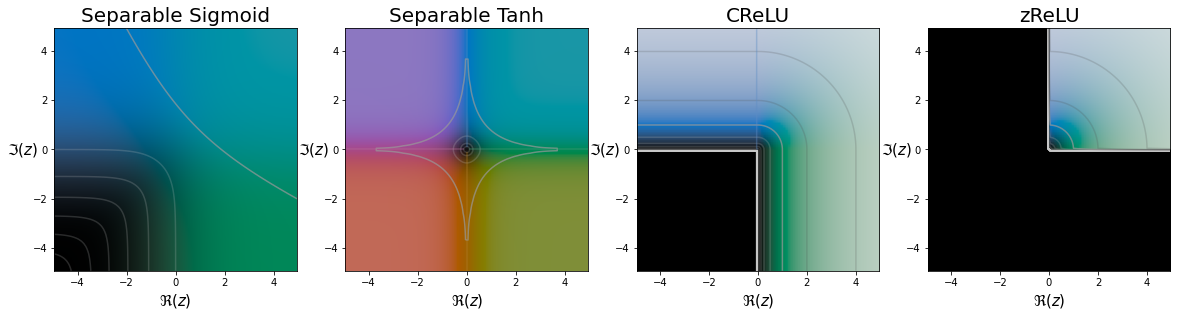

In [8]:
fig = plt.figure(figsize=(20, 7))

ax = fig.add_subplot(1, 4, 1)
cplot.plot(f=separable_sigmoid, x_range=(-5,5,100), y_range=(-5,5,100), add_colorbars=False)
ax.set_xlabel(r'$\Re(z)$', fontsize=15)
ax.set_ylabel(r'$\Im(z)$', fontsize=15)
ax.set_title('Separable Sigmoid', fontsize=20)

ax = fig.add_subplot(1, 4, 2)
cplot.plot(f=separable_tanh, x_range=(-5,5,100), y_range=(-5,5,100), add_colorbars=False)
ax.set_xlabel(r'$\Re(z)$', fontsize=15)
ax.set_ylabel(r'$\Im(z)$', fontsize=15)
ax.set_title('Separable Tanh', fontsize=20)

ax = fig.add_subplot(1, 4, 3)
cplot.plot(f=CReLU, x_range=(-5,5,100), y_range=(-5,5,100), add_colorbars=False)
ax.set_xlabel(r'$\Re(z)$', fontsize=15)
ax.set_ylabel(r'$\Im(z)$', fontsize=15)
ax.set_title('CReLU', fontsize=20)

ax = fig.add_subplot(1, 4, 4)
cplot.plot(f=zReLU, x_range=(-5,5,100), y_range=(-5,5,100), add_colorbars=False)
ax.set_xlabel(r'$\Re(z)$', fontsize=15)
ax.set_ylabel(r'$\Im(z)$', fontsize=15)
ax.set_title('zReLU', fontsize=20);

### Phase-preserving Activations

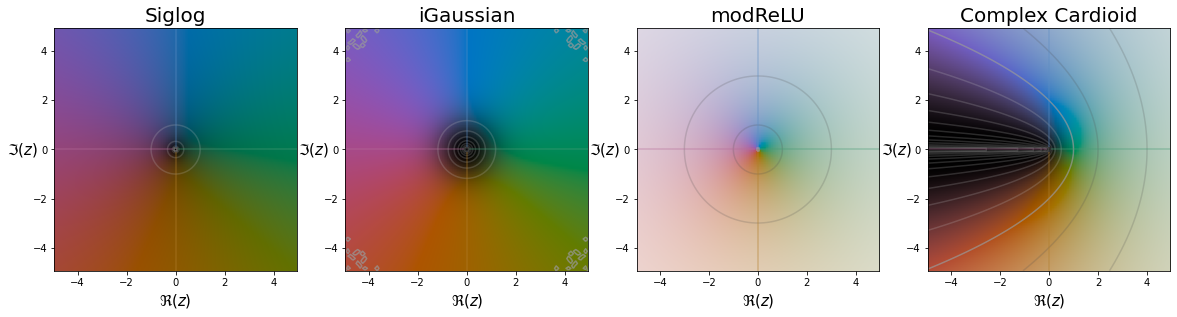

In [9]:
fig = plt.figure(figsize=(20, 7))

ax = fig.add_subplot(1, 4, 1)
cplot.plot(f=siglog, x_range=(-5,5,100), y_range=(-5,5,100), add_colorbars=False)
ax.set_xlabel(r'$\Re(z)$', fontsize=15)
ax.set_ylabel(r'$\Im(z)$', fontsize=15)
ax.set_title('Siglog', fontsize=20)

ax = fig.add_subplot(1, 4, 2)
cplot.plot(f=igaussian, x_range=(-5,5,100), y_range=(-5,5,100), add_colorbars=False)
ax.set_xlabel(r'$\Re(z)$', fontsize=15)
ax.set_ylabel(r'$\Im(z)$', fontsize=15)
ax.set_title('iGaussian', fontsize=20)

ax = fig.add_subplot(1, 4, 3)
cplot.plot(f=modReLU, x_range=(-5,5,100), y_range=(-5,5,100), add_colorbars=False)
ax.set_xlabel(r'$\Re(z)$', fontsize=15)
ax.set_ylabel(r'$\Im(z)$', fontsize=15)
ax.set_title('modReLU', fontsize=20)

ax = fig.add_subplot(1, 4, 4)
cplot.plot(f=cardioid, x_range=(-5,5,100), y_range=(-5,5,100), add_colorbars=False)
ax.set_xlabel(r'$\Re(z)$', fontsize=15)
ax.set_ylabel(r'$\Im(z)$', fontsize=15)
ax.set_title('Complex Cardioid', fontsize=20);

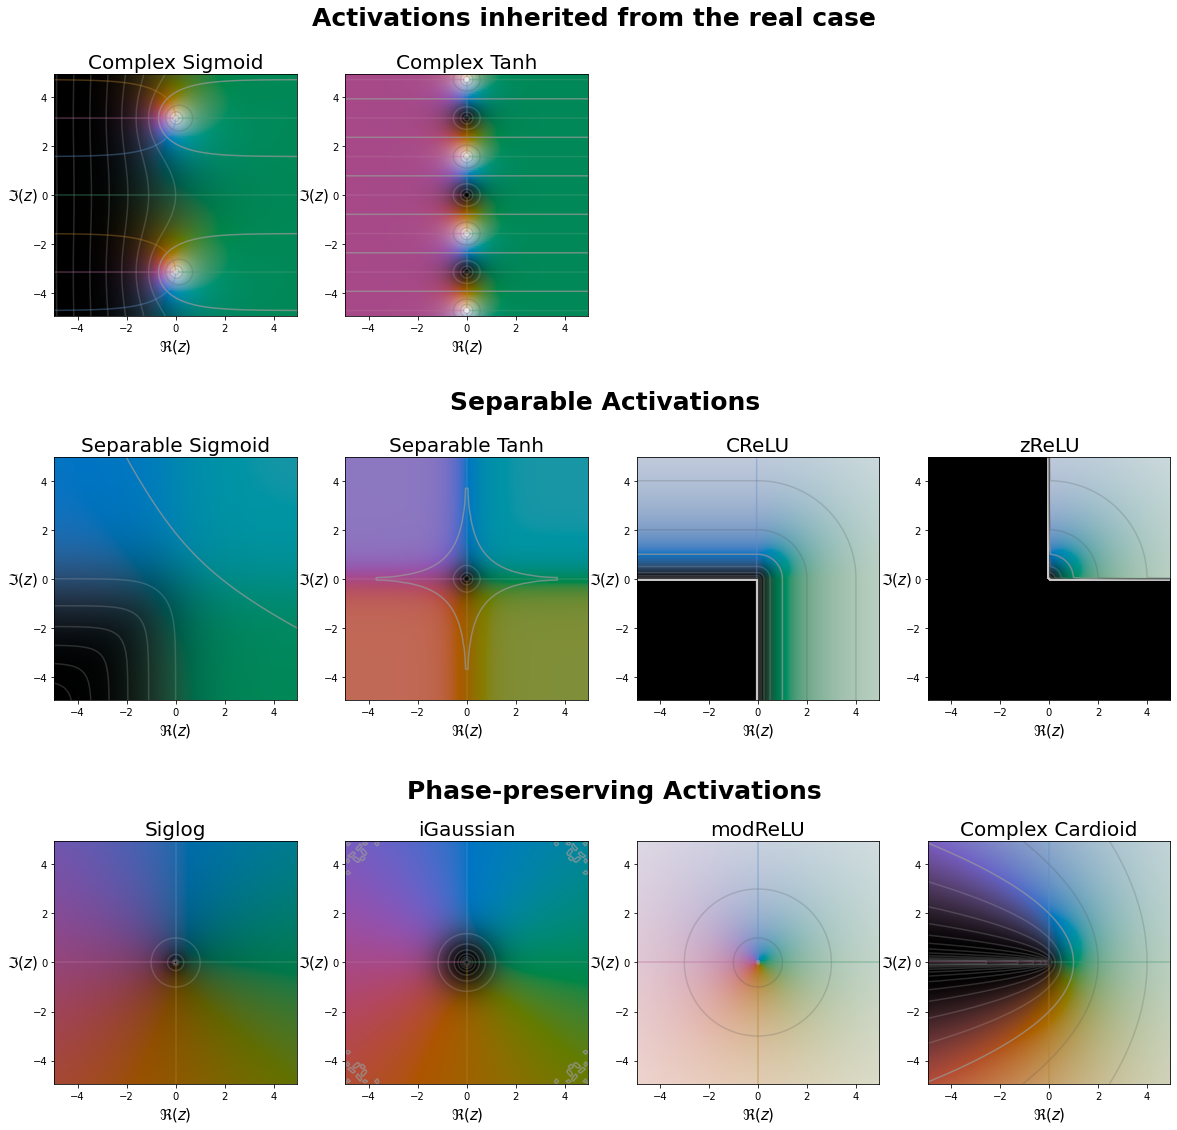

In [10]:
fig = plt.figure(figsize=(20,20))
axs = []

ax = fig.add_subplot(3, 4, 1)
cplot.plot(f=cmplx_sigmoid, x_range=(-5,5,100), y_range=(-5,5,100), add_colorbars=False)
ax.set_title('Complex Sigmoid', fontsize=20)
axs.append(ax)

ax = fig.add_subplot(3, 4, 2)
cplot.plot(f=cmplx_tanh, x_range=(-5,5,100), y_range=(-5,5,100), add_colorbars=False)
ax.set_title('Complex Tanh', fontsize=20)
axs.append(ax)

ax = fig.add_subplot(3, 4, 5)
cplot.plot(f=separable_sigmoid, x_range=(-5,5,100), y_range=(-5,5,100), add_colorbars=False)
ax.set_title('Separable Sigmoid', fontsize=20)
axs.append(ax)

ax = fig.add_subplot(3, 4, 6)
cplot.plot(f=separable_tanh, x_range=(-5,5,100), y_range=(-5,5,100), add_colorbars=False)
ax.set_title('Separable Tanh', fontsize=20)
axs.append(ax)

ax = fig.add_subplot(3, 4, 7)
cplot.plot(f=CReLU, x_range=(-5,5,100), y_range=(-5,5,100), add_colorbars=False)
ax.set_title('CReLU', fontsize=20)
axs.append(ax)

ax = fig.add_subplot(3, 4, 8)
cplot.plot(f=zReLU, x_range=(-5,5,100), y_range=(-5,5,100), add_colorbars=False)
ax.set_title('zReLU', fontsize=20)
axs.append(ax)

ax = fig.add_subplot(3, 4, 9)
cplot.plot(f=siglog, x_range=(-5,5,100), y_range=(-5,5,100), add_colorbars=False)
ax.set_title('Siglog', fontsize=20)
axs.append(ax)

ax = fig.add_subplot(3, 4, 10)
cplot.plot(f=igaussian, x_range=(-5,5,100), y_range=(-5,5,100), add_colorbars=False)
ax.set_title('iGaussian', fontsize=20)
axs.append(ax)

ax = fig.add_subplot(3, 4, 11)
cplot.plot(f=modReLU, x_range=(-5,5,100), y_range=(-5,5,100), add_colorbars=False)
ax.set_title('modReLU', fontsize=20)
axs.append(ax)

ax = fig.add_subplot(3, 4, 12)
cplot.plot(f=cardioid, x_range=(-5,5,100), y_range=(-5,5,100), add_colorbars=False)
ax.set_title('Complex Cardioid', fontsize=20);
axs.append(ax)

fig.suptitle('Activations inherited from the real case', y=0.9, fontsize=25, fontweight='bold')
fig.text(0.4, 0.62, 'Separable Activations', fontsize=25, fontweight='bold')
fig.text(0.37, 0.35, 'Phase-preserving Activations', fontsize=25, fontweight='bold')


for ax in axs:
    ax.set_xlabel(r'$\Re(z)$', fontsize=15)
    ax.set_ylabel(r'$\Im(z)$', fontsize=15)

In [11]:
#fig.savefig('cmplx_activations.pdf')

### Get the PhaseMNIST Dataset

In [12]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

In [13]:
class PhaseMNIST(Dataset):
    
    def __init__(self, path, transform=None):
        
        with open(path + 'data.npy', 'rb') as f:
            self.data = np.load(f)
            
        with open(path + 'labels.npy', 'rb') as f:
            self.labels = np.load(f)
        
        self.length = len(self.labels)
        self.transform = transform
        
    def __len__(self):
        return self.length
    
    def __getitem__(self, index):
        
        sample = (self.data[index], self.labels[index])
        
        if self.transform is not None:
            sample = self.transform(sample)
        
        return sample

In [14]:
class ToTensor_onehot(object):
    """Convert sample to Tensors and one-hot encode the labels."""
    def __init__(self, n_classes=2):
        self.n_classes = n_classes

    def __call__(self, sample):
        x, y = sample
        # One-hot encoding
        y = np.eye(self.n_classes)[y]
        return ( torch.from_numpy(x), torch.tensor([y]) )
    
class Squeeze(object):
    """Remove the extra dimensions of the tensors."""
    def __init__(self, squeeze_x=True, squeeze_y=True):
        self.squeeze_x = squeeze_x
        self.squeeze_y = squeeze_y
    
    def __call__(self, sample):
        x, y = sample
        if self.squeeze_x:
            x = torch.squeeze(x)
        if self.squeeze_y:
            y = torch.squeeze(y)
        return ( x, y )

In [15]:
def build_dataloaders(data_dir, composed_transform, drop_length=0, test_frac=0.25, batch_size=32):
    
    full_dataset = PhaseMNIST(path=data_dir, transform=composed_transform)
    
    train_len = int((1.-test_frac) * (len(full_dataset)-drop_length))
    test_len = len(full_dataset) - train_len - drop_length
    train_ds, test_ds, _ = torch.utils.data.random_split(full_dataset, [train_len, test_len, drop_length])
    
    #print( get_circularity_coeff(train_ds) )
    #print( get_circularity_coeff(test_ds) )
        
    train_dataloader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

    test_dataloader = DataLoader(test_ds, batch_size=batch_size, shuffle=True)
    
    return train_dataloader, test_dataloader

In [16]:
mnist_path = 'data/PhaseMNIST/'
batch_size = 64
drop_length = 65000
data_transform = transforms.Compose([ToTensor_onehot(n_classes=10), Squeeze(squeeze_x=False)])

In [17]:
train_dl, test_dl = build_dataloaders(mnist_path, data_transform, drop_length, batch_size=batch_size)

batch_sample = next(iter(test_dl))
print('Data shapes:\n x-> {} y-> {}'.format(batch_sample[0].shape, batch_sample[1].shape))
print('\nNumber of samples in the datasets: \n  Training set: {0} \n  Test set: {1}'.format(len(train_dl)*batch_size, len(test_dl)*batch_size))

Data shapes:
 x-> torch.Size([64, 28, 28]) y-> torch.Size([64, 10])

Number of samples in the datasets: 
  Training set: 3776 
  Test set: 1280


## Test Different Activation Functions

In [18]:
activations = [cmplx_sigmoid, cmplx_tanh, separable_sigmoid, separable_tanh, CReLU, zReLU, siglog, igaussian, modReLU, cardioid]
labels = ['cmplx_sigmoid', 'cmplx_tanh', 'separable_sigmoid', 'separable_tanh', 'CReLU', 'zReLU', 'siglog', 'igaussian', 'modReLU', 'cardioid']
scores_activations = {k: None for k in labels}

for i in range(len(labels)):
    
    continue
    
    class ComplexMLP_Winit(hk.Module):
    
        def __init__(self):
            super().__init__()
            self.fc1 = Cmplx_Linear(32)
            self.fc2 = Cmplx_Linear(16)
            self.fc3 = Cmplx_Linear(10)
        
            self.batchnorm = CmplxBatchNorm(create_scale=True, create_offset=True, decay_rate=0.9, data_format='channels_first')
            self.dropout = Dropout(0.3)
            self.flatten = hk.Flatten()        
            self.act = activations[i]
        
        def __call__(self, z, is_training):
            z = self.flatten(z)
            z = self.act(self.fc1(z))
            z = self.batchnorm(z, is_training)
            z = self.dropout(z)
            z = self.act(self.fc2(z))
            z = self.fc3(z)
            return z
        
        
    HC_cmplx = Haiku_Classifier()
    _ = HC_cmplx.train(n_epochs = 50,
                       model = ComplexMLP_Winit, 
                       optimizer = cmplx_adam(step_size=1e-3),  
                       train_dataloader = train_dl,
                       test_dataloader = test_dl,
                       verbose = False
                       )    
        
    scores_activations[labels[i]] = HC_cmplx.training_history
    
#with open('notebook_results/scores_activations.pkl', 'wb') as f:
#    pickle.dump(scores_activations, f)

In [19]:
with open('notebook_results/scores_activations.pkl', 'rb') as f:
    scores_activations = pickle.load(f)

Text(0.5, 1.0, 'Validation accuracy')

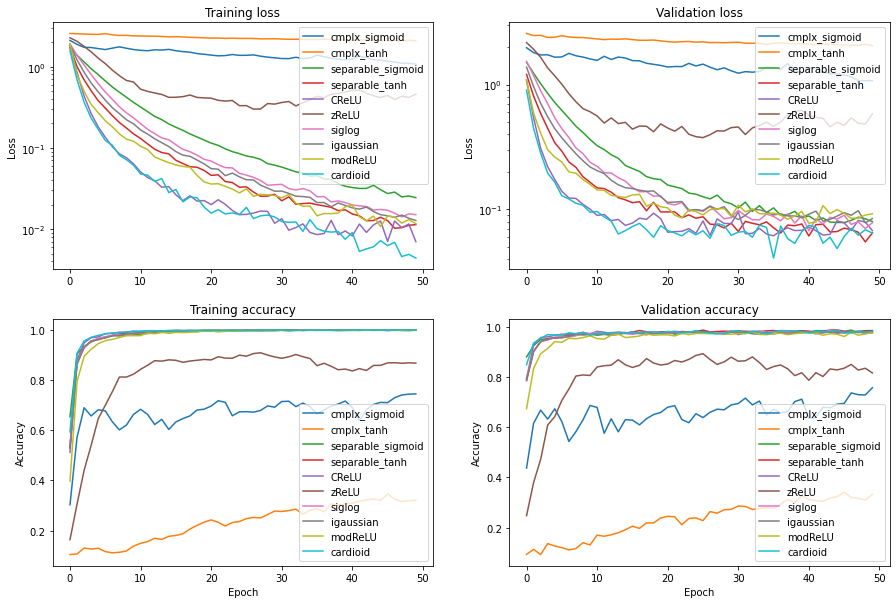

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))
ax = ax.flatten()

for label in scores_activations:
    
    history = scores_activations[label]
    
    sns.lineplot(x=np.arange(len(history['train_loss'])), y=history['train_loss'], label=label, ax=ax[0])
    sns.lineplot(x=np.arange(len(history['val_loss'])), y=history['val_loss'], label=label, ax=ax[1])
    
    sns.lineplot(x=np.arange(len(history['train_acc'])), y=history['train_acc'], label=label, ax=ax[2])
    sns.lineplot(x=np.arange(len(history['val_acc'])), y=history['val_acc'], label=label, ax=ax[3])

    
ax[0].set_yscale('log')
ax[0].set_ylabel('Loss')
ax[0].set_title('Training loss')

ax[1].set_yscale('log')
ax[1].set_ylabel('Loss')
ax[1].set_title('Validation loss')

ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Accuracy')
ax[2].set_title('Training accuracy')

ax[3].set_xlabel('Epoch')
ax[3].set_ylabel('Accuracy')
ax[3].set_title('Validation accuracy')

The one working better is by far the cardioid, even if we manage to obtain decent results also with some others.